In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
a=print(5)
a

5


In [4]:
def plot_verticles2D(vertices, filename = None, color = 'r', title = ''):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    
    ax.scatter(x, y, c=color, marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show or save the plot
    if filename is None:
        plt.grid()
        plt.show()
    else:
        plt.savefig(filename)


def plot_verticles(vertices, isosurf = False, filename = None, color = 'r', title = ''):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices] 
    print(x)   
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c=color, marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

In [5]:
a


[[-0.61237244 -0.61237244 -0.5         2.        ]
 [-0.78914913  0.43559574  0.4330127  12.        ]
 [-0.04736717  0.65973961 -0.75       22.        ]
 [ 0.          0.          0.          1.        ]]
.. [[8.8817842e-16]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]]
[[ 11.73661224]
 [-18.5166754 ]
 [ 12.30384758]
 [  1.        ]]
[[  2.          11.73661224   0.        ]
 [ 12.         -18.5166754    0.        ]
 [ 22.          12.30384758   0.        ]
 [  1.           1.           1.        ]]
[2.0, 11.736612243699051, 0.0]


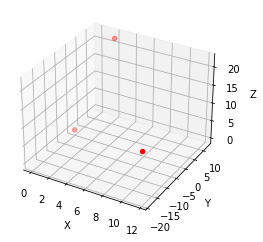

[[-16.37117307 -11.67447393  20.57898482   1.        ]
 [-16.37117307  25.06787221  41.79218825   1.        ]
 [-13.          24.99038106  -0.5          1.        ]]


In [111]:
#Углы поворота 1 камеры отн шаблона###
pi = np.pi
a1=-5*pi/6
b1=(-pi/6)
c1=(3*pi/4)
 
#Коорд перемещения 1 камеры отн шаблона#  
xc1=2 
yc1=12
zc1=22
 
#Внутренние параметры камер####
f=3000 #фокус px
cx=0 #принцип.точка   центр изображения по Ох
cy=0 #принцип.точка   центр изображения по Оy
##############
 
#Вычисление матриц поворота, перемещения и их произведения для каждой
#камеры
 
Rx=np.array([[1,0,0],
    [0, np.cos(a1),-np.sin(a1)],
    [0,np.sin(a1),np.cos(a1)]])
 
Ry=np.array([[np.cos(b1),0,np.sin(b1)],
    [0,1,0],
    [-np.sin(b1),0,np.cos(b1)]])
  
Rz=np.array([[np.cos(c1),-np.sin(c1),0],
    [np.sin(c1),np.cos(c1),0],
    [0,0,1]])
  
T=np.array([[xc1,
   yc1,
   zc1]]).T
 
R=np.dot(Rx.dot(Ry),Rz)

O=np.zeros((1,3));
 
####
C1 = np.zeros((4,4))
C1[:3,:3]=R
C1[:3,3:4] =  T
C1[3,3] = 1.
#C1=[R T;O 1];(Коор. в системе камеры)*С'=(коорд. отн шаблона)    
##матрица внешней калибровки Сс=inv(C)
print(C1)

Cc1 = np.zeros((4,4))
Cc1[:3,:3]=R.T
Cc1[:3,3:4] =  -(R.T.dot(T))
Cc1[3,3] = 1.

#Cc1=[R' -R'*T;O 1];
#(Коор. в системе шаблона)*Сс'=(коорд. отн камеры)
####
 
 
 
 
 
##Матрица внутренней калибровки##
K=np.array([[f, 0, cx],
   [0, f, cy],
   [0, 0 , 1]])
#############
 
##Матрицы проекции###
I = np.hstack((np.eye(3),np.zeros((3,1))) )
Pr1=np.dot(K.dot(I),Cc1)
#########
 
#Проверка полученных матриц#
 
# C2=[0 0 0 1]*C1'
############
 
#ШАБЛОН - МИРОВАЯ СИСТЕМА КООРДИНАТ
 
###########
 
#axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)

#Построение#

 
#положение камер отн шаблона#
Oc_ = np.array([[xc1],[yc1],[zc1],[1]])
Oc_0 = np.array([[0, 0, 0, 1]]).T 
print('..',np.dot(Cc1,Oc_)) 
Oc=np.dot(Cc1,Oc_0)
print(Cc1)#первод из мировой  в видовую
#перевод из видовой в мировую
vertices_ = np.hstack((Oc_,Oc,Oc_0))
print(vertices_ )
plot_verticles(vertices_[:3,:].T, isosurf = False, filename = None) 
 
#орты базиса мировой системы координат
OrtX=np.array([[30, 0, 0, 1],[0, 30, 0, 1],[0, 0, 30, 1]])
#орты базиса камеры отн мировой системы координат
OrtXc=OrtX.dot(C1.T)
print(OrtXc) 
 
#plt.plot3D([OrtXc(1) Oc(1)],[OrtXc(2) Oc(2)],[OrtXc(3) Oc(3)],'r','LineWidth',3)
#plt.plot3D([OrtYc(1) Oc(1)],[OrtYc(2) Oc(2)],[OrtYc(3) Oc(3)],'g','LineWidth',3)
#plt.plot3D([OrtZc(1) Oc(1)],[OrtZc(2) Oc(2)],[OrtZc(3) Oc(3)],'b','LineWidth',3)
 


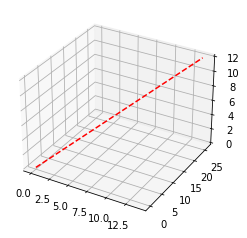

In [112]:
X=14
Y=26
Z=12
xc1=1
yc1=12
zc1=22
#параметры камеры 
f=3000 #фокус px
cx=0 #принцип.точка   центр изображения по Ох
cy=0 #принцип.точка   центр изображения по Оy
Rx=np.array([[1,0,0],
    [0, np.cos(a1),-np.sin(a1)],
    [0,np.sin(a1),np.cos(a1)]])
 
Ry=np.array([[np.cos(b1),0,np.sin(b1)],
    [0,1,0],
    [-np.sin(b1),0,np.cos(b1)]])
  
Rz=np.array([[np.cos(c1),-np.sin(c1),0],
    [np.sin(c1),np.cos(c1),0],
    [0,0,1]])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D([0 , X], [0, Y] , [0,Z], '--r')

[110.0, 109.98476951563913, 109.93908270190957, 109.86295347545739, 109.75640502598242, 109.61946980917456, 109.45218953682733, 109.2546151641322, 109.02680687415703, 108.76883405951378, 108.4807753012208, 108.1627183447664, 107.81476007338057, 107.43700647852353, 107.02957262759965, 106.59258262890683, 106.12616959383189, 105.63047559630355, 105.10565162951535, 104.55185755993169, 103.96926207859084, 103.35804264972018, 102.71838545667875, 102.05048534524404, 101.35454576426008, 100.63077870366499, 99.8794046299167, 99.10065241883679, 98.2947592858927, 97.46197071393958, 96.60254037844388, 95.71673007021123, 94.8048096156426, 93.8670567945424, 92.90375725550417, 91.91520442889917, 90.90169943749474, 89.86355100472929, 88.80107536067219, 87.71459614569707, 86.60444431189781, 85.4709580222772, 84.31448254773943, 83.13537016191705, 81.93398003386513, 80.71067811865476, 79.46583704589973, 78.19983600624985, 76.91306063588583, 75.60590289905073, 74.27876096865394, 72.93203910498374, 71.566

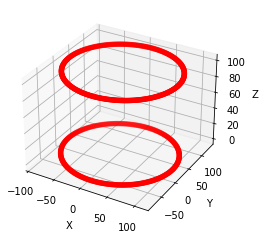

[-71.40733830268697, -72.77526671125298, -74.1241249779645, -75.45350222752687, -76.76299351875186, -78.05219996790684, -79.32072887021857, -80.56819381949492, -81.79421482582785, -82.99841843134212, -84.18043782395408, -85.33991294910629, -86.47649061944351, -87.5898246223971, -88.67957582564466, -89.74541228041298, -90.78700932259302, -91.8040496716355, -92.79622352719782, -93.7632286635122, -94.70477052144648, -95.62056229822984, -96.51032503481561, -97.37378770085489, -98.21068727725503, -99.02076883629788, -99.80378561929308, -100.55949911174328, -101.28767911599795, -101.98810382137368, -102.66055987172015, -103.30484243041012, -103.92075524273494, -104.50811069568547, -105.06672987510095, -105.5964426201678, -106.09708757525249, -106.5685122390518, -107.01057301104635, -107.42313523524267, -107.80607324119069, -108.1592703822642, -108.4826190711925, -108.7760208128326, -109.03938623417176, -109.27263511155138, -109.47569639510385, -109.64850823039512, -109.79101797726608, -109.9

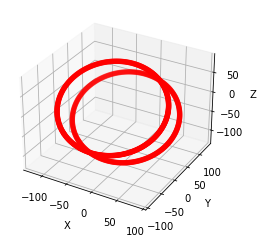

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


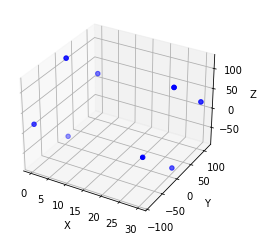

[-76.01713562037592, -1.8389397956704485, 81.81269057811036, 7.634494753404871, -76.01713562037592, -1.838939795670468, -94.38830869124976, -20.210112866544286, 63.44151750723651, -10.736678317468963, -94.38830869124976, -20.2101128665443]


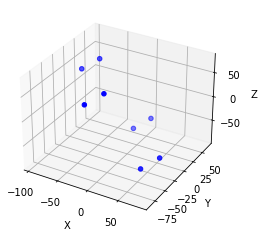

[[ 3.00000000e+01  0.00000000e+00 -1.77635684e-15  1.00000000e+00]
 [ 0.00000000e+00  3.00000000e+01  1.77635684e-15  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.00000000e+01  1.00000000e+00]]
[[ 1.00000000e+00 -3.48179713e-17 -6.75995734e-17  0.00000000e+00]
 [-3.48179713e-17  1.00000000e+00 -4.54902347e-17  0.00000000e+00]
 [-6.75995734e-17 -4.54902347e-17  1.00000000e+00  0.00000000e+00]
 [ 1.77635684e-15  0.00000000e+00  1.77635684e-15  1.00000000e+00]]


In [113]:

#Пример 2. Размещение объектов (окружность в плоскости ХОУ и квадрат в плоскости YOZ ) в видовой системе координат и отображение из в видовой системе координат камеры

# окружность в плоскости ХОУ

r1=100  
a=10 
b=20
def circle(r1,a,b, c = 0): 
  XY=[]
  for f in range(0,361):
    x = r1*np.cos (f/180*pi)+a;
    y = r1*np.sin(f/180*pi)+b;
    
    XY += [[x , y, c, 1]];

  XY = np.array(XY) 
  return XY

XY_circle = circle(r1,a,b)
XY_circle10 = circle(r1,a,b+10, c = 100)
XY_circle = np.vstack((XY_circle,XY_circle10))
# квадрат в плоскости ZОУ

r1 = 100
a = 10
b = 20
 
def quad(r1,a,b, c=0):
  XY = []
  for f in range(0,481,90):
    y=r1*np.cos (f/180*pi)+a;
    z=r1*np.sin(f/180*pi)+b;
    x = c
    XY += [[x , y, z, 1]];

  XY = np.array(XY) 
  return XY
 
XY_quad = quad(r1,a,b)
XY_quad10 = quad(r1,a,b, c = 30)
XY_quad = np.vstack((XY_quad,XY_quad10)) 
 
#Точки для проецирования 
 
# система координат камеры

XY_circleC = Cc1.dot(XY_circle.T)
XY_quadC = Cc1.dot(XY_quad.T)

plot_verticles(XY_circle[:,:3], isosurf = False, filename = None, title = 'круг') 
plot_verticles(XY_circleC[:3,:].T, isosurf = False, filename = None, title = 'круг в новой системе координат') 
plot_verticles(XY_quad[:,:3], isosurf = False,color='b', filename = None, title = 'квадрат в новой системе координат') 
plot_verticles(XY_quadC[:3,:].T, isosurf = False, color='b',filename = None, title = 'квадрат в новой системе координат') 


#проверка правильности : должно получиться 3 орта по основным осям

#орты базиса мировой системы координат
OrtX=np.array([[30, 0, 0, 1],[0, 30, 0, 1],[0, 0, 30, 1]])
#орты базиса камеры отн мировой системы координат
OrtXc0=OrtXc.dot(Cc1.T)
print(OrtXc0) 

Oc=C1.T.dot(Cc1.T)
print(Oc)



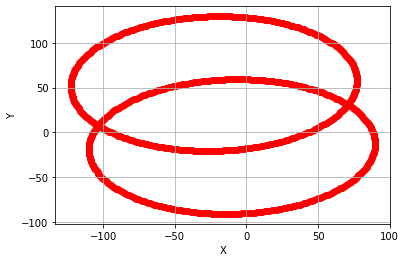

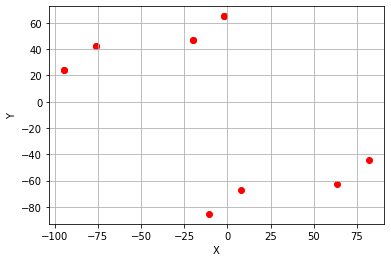

In [136]:
#Пример 3. Проецирование на экранную плоскость для ортогональной проекции
 
#Проекция
 
#Ортогональная
 #проекция на плоскость ХОУ
Ort_p = np.array([[1 ,0 ,0, 0],[ 0, 1, 0, 0],[ 0, 0, 1, 0],[ 0, 0, 0, 0]])

#круг
xy_circ_ort = XY_circleC.T.dot(Ort_p)
#квадрат
xy_quad_ort = XY_quadC.T.dot(Ort_p)
 
#отображение
xy = xy_circ_ort

plot_verticles2D(xy,  filename = None) 

xy = xy_quad_ort
plot_verticles2D(xy,  filename = None) 


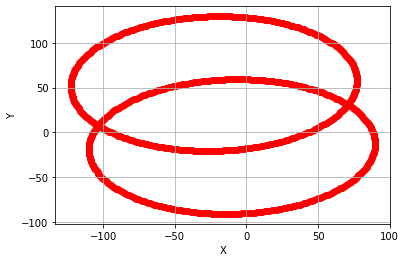

In [115]:
#круг
xy_circ_ort = XY_circleC.T.dot(Ort_p)
#квадрат
xy_quad_ort = XY_quadC.T.dot(Ort_p)
 
#отображение
xy = xy_circ_ort

plot_verticles2D(xy,  filename = None) 

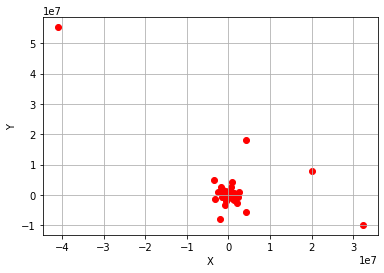

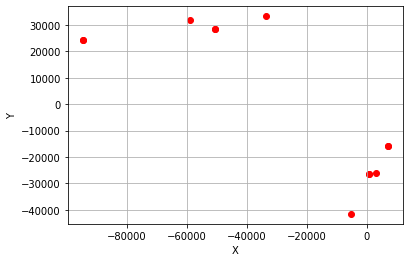

In [116]:
#Пример 4. Проецирование на экранную плоскость для центральной проекции

#центральная
px=0.1
py=0.1
II=np.array([[1 ,0 ,0 ,0],[ 0, 1, 0, 0],[ 0, 0, 1, 0]]) #проекция на ретину
K=np.array([[f/px, 0, cx],[0 ,f/py, cy],[ 0, 0, 1]]) #камера
#матрица проецирования
Ort_c=K.dot(II)
#проекция окружности
xy_circle=Ort_c.dot(XY_circleC)

xy_circle[0,:] = xy_circle[0,:]/xy_circle[2,:]
xy_circle[1,:] = xy_circle[1,:]/xy_circle[2,:]
xy_circle[2,:] = xy_circle[2,:]/xy_circle[2,:]
#проекция квадрата
xy_quad=Ort_c.dot(XY_quadC)
xy_quad[0,:] = xy_quad[0,:]/xy_quad[2,:]
xy_quad[1,:] = xy_quad[1,:]/xy_quad[2,:]
xy_quad[2,:] = xy_quad[2,:]/xy_quad[2,:]
#отображение
xy=xy_circle.T

plot_verticles2D(xy,  filename = None) 

xy=xy_quad.T

plot_verticles2D(xy,  filename = None) 
#

[[ 0.78253406 -0.37099926 -0.5         2.        ]
 [-0.2572778   0.53861614 -0.80230966 12.        ]
 [ 0.56696436  0.75647353  0.3260356  22.        ]
 [ 0.          0.          0.          1.        ]]
.. [[ 0.00000000e+00]
 [-1.77635684e-15]
 [ 0.00000000e+00]
 [ 1.00000000e+00]]
[[  0.78253406  -0.2572778    0.56696436 -10.95095038]
 [ -0.37099926   0.53861614   0.75647353 -22.36381286]
 [ -0.5         -0.80230966   0.3260356    3.45493269]
 [  0.           0.           0.           1.        ]]
[[  2.         -10.95095038   0.        ]
 [ 12.         -22.36381286   0.        ]
 [ 22.           3.45493269   0.        ]
 [  1.           1.           1.        ]]
[2.0, -10.950950382832167, 0.0]


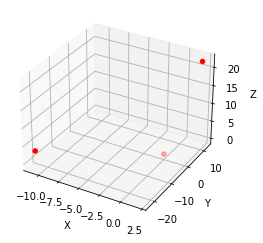

[[ 25.47602171   4.28166599  39.00893073   1.        ]
 [ -9.12997774  28.1584842   44.69420596   1.        ]
 [-13.         -12.06928974  31.78106801   1.        ]]


In [117]:
V=(14,26,12,1)
xc1=2 
yc1=12
zc1=22
ax= np.pi/2-np.arctan((V[2]/((V[0]**2+V[1]**2)**0.5)))
az= np.arctan(V[0]/((V[0]**2+V[1]**2)**0.5))
Rx=np.array([[1,0,0],
    [0, np.cos(ax),-np.sin(ax)],
    [0,np.sin(ax),np.cos(ax)]])
Rz=np.array([[np.cos(az),-np.sin(az),0],
    [np.sin(az),np.cos(az),0],
    [0,0,1]])
T=np.array([[xc1,
   yc1,
   zc1]]).T
 
R=np.dot(Rx.dot(Ry),Rz)
 
O=np.zeros((1,3));
 
####
C1 = np.zeros((4,4))
C1[:3,:3]=R
C1[:3,3:4] =  T
C1[3,3] = 1.
#C1=[R T;O 1];(Коор. в системе камеры)*С'=(коорд. отн шаблона)    
##матрица внешней калибровки Сс=inv(C)
print(C1)

Cc1 = np.zeros((4,4))
Cc1[:3,:3]=R.T
Cc1[:3,3:4] =  -(R.T.dot(T))
Cc1[3,3] = 1.

#Cc1=[R' -R'*T;O 1];
#(Коор. в системе шаблона)*Сс'=(коорд. отн камеры)
####
 
 
 
 
 
##Матрица внутренней калибровки##
K=np.array([[f, 0, cx],
   [0, f, cy],
   [0, 0 , 1]])
#############
 
##Матрицы проекции###
I = np.hstack((np.eye(3),np.zeros((3,1))) )
Pr1=np.dot(K.dot(I),Cc1)
#########
 
#Проверка полученных матриц#
 
# C2=[0 0 0 1]*C1'
############
 
#ШАБЛОН - МИРОВАЯ СИСТЕМА КООРДИНАТ
 
###########
 
#axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)

#Построение#

 
#положение камер отн шаблона#
Oc_ = np.array([[xc1],[yc1],[zc1],[1]])
Oc_0 = np.array([[0, 0, 0, 1]]).T 
print('..',np.dot(Cc1,Oc_)) 
Oc=np.dot(Cc1,Oc_0)
print(Cc1)#первод из мировой  в видовую
#перевод из видовой в мировую
vertices_ = np.hstack((Oc_,Oc,Oc_0))
print(vertices_ )
plot_verticles(vertices_[:3,:].T, isosurf = False, filename = None) 
 
#орты базиса мировой системы координат
OrtX=np.array([[30, 0, 0, 1],[0, 30, 0, 1],[0, 0, 30, 1]])
#орты базиса камеры отн мировой системы координат
OrtXc=OrtX.dot(C1.T)
print(OrtXc) 
 
#plt.plot3D([OrtXc(1) Oc(1)],[OrtXc(2) Oc(2)],[OrtXc(3) Oc(3)],'r','LineWidth',3)
#plt.plot3D([OrtYc(1) Oc(1)],[OrtYc(2) Oc(2)],[OrtYc(3) Oc(3)],'g','LineWidth',3)
#plt.plot3D([OrtZc(1) Oc(1)],[OrtZc(2) Oc(2)],[OrtZc(3) Oc(3)],'b','LineWidth',3)
 


Задание 1. Выполнить примеры 1-4 (lab5.m)  и зафиксировать результаты.
Практическое задание
1.	Перейти к видовой системе координат
Вектор  оси зрения (Х= №по журналу, У=день рождения, Z = месяц рождения)
Точка зрения = текущая дата дд.мм.гг
2.	Построить фигуру
3.	Построить ортогональную проекцию
4.	Построить центральную проекцию (f=100)

[[  1.25764477 -15.81598943  -2.2962596    1.        ]
 [ -4.41199881 -23.38072474  -5.5566156    1.        ]
 [ -2.12976926 -13.79337625  -1.09856925   1.        ]
 [ -7.79941284 -21.35811157  -4.35892526   1.        ]
 [ -4.74534989 -13.3866115    2.50605006   1.        ]
 [-10.41499347 -20.95134682  -0.75430594   1.        ]]


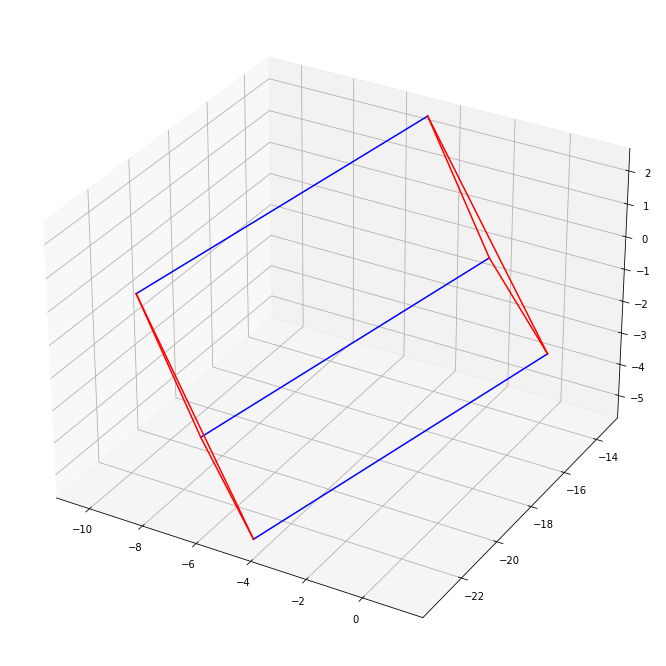

In [145]:
P1 = [10, 5, 0, 1]
P2 = [6, 6,  0,1]
P3 = [2, 4 ,0,1]
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
P=np.array([P1,P2,P3])
T=np.array([[1, 0, 0, 0],[0 ,1 ,0, 0],[0, 0, 1, 0],[  0, 0,  10,1]])
P_new = np.dot(P,T)

P = np.dot(P,Cc1.T)
P_new=np.dot(P_new,Cc1.T)
Pr=P
for i in range(3):
    ax.plot3D([P[i,0], P_new[i,0]],[P[i,1],P_new[i,1]],[P[i,2],P_new[i,2]],'b')
    
for i in range(2):
    ax.plot([P[i,0], P[i+1,0]],[P[i,1],P[i+1,1]],[P[i,2],P[i+1,2]],'r')
    ax.plot([P_new[i,0], P_new[i+1,0]],[P_new[i,1],P_new[i+1,1]],[P_new[i,2],P_new[i+1,2]],'r')
ax.plot([P[2,0], P[0,0]],[P[2,1],P[0,1]],[P[2,2],P[0,2]],'r')
ax.plot([P_new[2,0], P_new[0,0]],[P_new[2,1],P_new[0,1]],[P_new[2,2],P_new[0,2]],'r')
Pr = []
for i in range(3):
    Pr.append(P_new[i,:].tolist())
    Pr.append(P[i,:].tolist())
Pr=np.array(Pr)
Pr.shape
print (Pr)

24
[[  1.25764477 -15.81598943  -2.2962596    1.        ]
 [ -4.41199881 -23.38072474  -5.5566156    1.        ]
 [ -2.12976926 -13.79337625  -1.09856925   1.        ]
 [ -7.79941284 -21.35811157  -4.35892526   1.        ]
 [ -4.74534989 -13.3866115    2.50605006   1.        ]
 [-10.41499347 -20.95134682  -0.75430594   1.        ]]


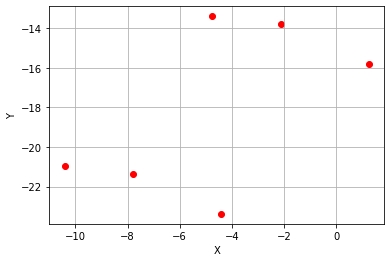

[[  1.25764477 -15.81598943  -2.2962596 ]
 [ -4.41199881 -23.38072474  -5.5566156 ]
 [ -2.12976926 -13.79337625  -1.09856925]
 [ -7.79941284 -21.35811157  -4.35892526]
 [ -4.74534989 -13.3866115    2.50605006]
 [-10.41499347 -20.95134682  -0.75430594]]


In [150]:

print(np.size(Pr))
Ort_p = np.array([[1 ,0 ,0, 0],[ 0, 1, 0, 0],[ 0, 0, 1, 0]])
print(Pr)
xy_quad_ort=np.dot(Pr,Ort_p.T)

#отображение
xy = xy_quad_ort
plot_verticles2D(xy,  filename = None) 
print ( xy)

[[  1.25764477 -15.81598943  -2.2962596    1.        ]
 [ -4.41199881 -23.38072474  -5.5566156    1.        ]
 [ -2.12976926 -13.79337625  -1.09856925   1.        ]
 [ -7.79941284 -21.35811157  -4.35892526   1.        ]
 [ -4.74534989 -13.3866115    2.50605006   1.        ]
 [-10.41499347 -20.95134682  -0.75430594   1.        ]]
[[ 1.25764477e+03 -4.41199881e+03 -2.12976926e+03 -7.79941284e+03
  -4.74534989e+03 -1.04149935e+04]
 [-1.58159894e+04 -2.33807247e+04 -1.37933763e+04 -2.13581116e+04
  -1.33866115e+04 -2.09513468e+04]
 [-2.29625960e+00 -5.55661560e+00 -1.09856925e+00 -4.35892526e+00
   2.50605006e+00 -7.54305940e-01]]


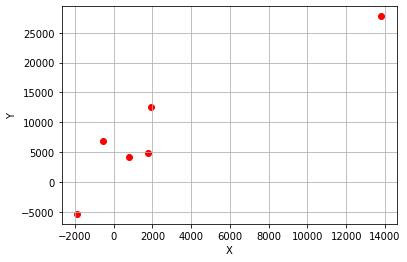

[[-5.47692764e+02  6.88771838e+03  1.00000000e+00]
 [ 7.94008283e+02  4.20772759e+03  1.00000000e+00]
 [ 1.93867547e+03  1.25557640e+04  1.00000000e+00]
 [ 1.78929722e+03  4.89985726e+03  1.00000000e+00]
 [-1.89355750e+03 -5.34171751e+03  1.00000000e+00]
 [ 1.38073863e+04  2.77756620e+04  1.00000000e+00]]


In [156]:
f=100
px=0.1
py=0.1
II=np.array([[1 ,0 ,0 ,0],[ 0, 1, 0, 0],[ 0, 0, 1, 0]]) #проекция на ретину
K=np.array([[f/px, 0, cx],[0 ,f/py, cy],[ 0, 0, 1]]) #камера
#матрица проецирования
Ort_c=K.dot(II)
print ( Pr)
#проекция квадрата
xy_quad=np.dot(Pr,Ort_c.T).T
print(xy_quad)
xy_quad[0,:] = xy_quad[0,:]/xy_quad[2,:]
xy_quad[1,:] = xy_quad[1,:]/xy_quad[2,:]
xy_quad[2,:] = xy_quad[2,:]/xy_quad[2,:]


xy=xy_quad.T

plot_verticles2D(xy,  filename = None) 
print (xy)